In [1]:
import skfuzzy as skf
import numpy as np
from matplotlib import pyplot as plt
from skfuzzy import control as ctrl

In [2]:
def trapezoid(array, a, b, c, d):
    res = np.zeros_like(array)
    div1 = b - a
    div2 = c - d
    for i, x in enumerate(array):
        if x <= a or x >= d:
            res[i] = 0
        elif b <= x <= c:
            res[i] = 1.
        elif a < x < b:
            res[i] = (x - a)/div1
        elif c < x < d:
            res[i] = (x - d)/div2

    return res

C:\Users\kolom\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


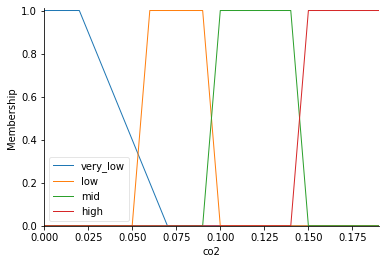

In [3]:
co2 = ctrl.Antecedent(np.arange(0,0.2, 0.01), "co2")

co2['very_low'] = trapezoid(co2.universe, -1, 0, 0.02, 0.07)
co2["low"] = skf.gauss2mf(co2.universe, 0.06, 0.001, 0.095, 0.001)
co2["mid"] = skf.gauss2mf(co2.universe, 0.1, 0.001, 0.145, 0.001)
co2["high"] = skf.gauss2mf(co2.universe, 0.15, 0.001, 0.3, 0.001)

co2.view()

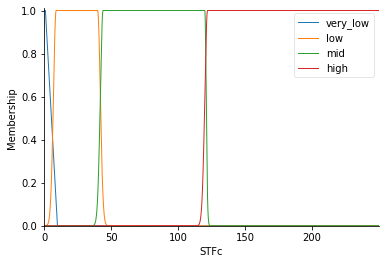

In [4]:
STFc = ctrl.Antecedent(np.arange(0, 250, 0.1), "STFc")

STFc['very_low'] = trapezoid(STFc.universe, -1, 0, 1, 10)
STFc["low"] = skf.gauss2mf(STFc.universe, 9, 2, 40, 2)
STFc["mid"] = skf.gauss2mf(STFc.universe, 44, 2, 120, 1)
STFc["high"] = skf.gauss2mf(STFc.universe, 122, 2, 300, 2)

STFc.view()

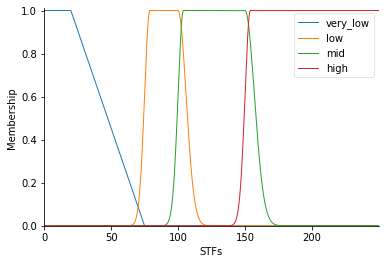

In [5]:
STFs = ctrl.Antecedent(np.arange(0, 250, 0.1), "STFs")

STFs['very_low'] = trapezoid(STFs.universe, -1, 0, 20, 75)
STFs["low"] = skf.gauss2mf(STFs.universe, 79, 4, 100, 6)
STFs["mid"] = skf.gauss2mf(STFs.universe, 104, 4, 150, 7)
STFs["high"] = skf.gauss2mf(STFs.universe, 154, 4, 300, 7)

STFs.view()

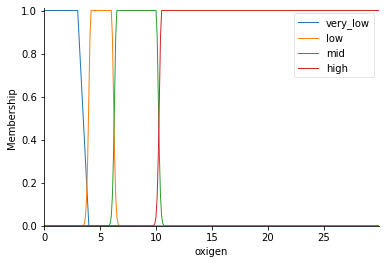

In [6]:
oxigen = ctrl.Antecedent(np.arange(0, 30, 0.1), "oxigen")

oxigen['very_low'] = trapezoid(oxigen.universe, -1, 0, 3, 4)
oxigen["low"] = skf.gauss2mf(oxigen.universe, 4.2, 0.2, 6, 0.2)
oxigen["mid"] = skf.gauss2mf(oxigen.universe, 6.5, 0.2, 10, 0.2)
oxigen["high"] = skf.gauss2mf(oxigen.universe, 10.5, 0.2, 30, 0.2)

oxigen.view()

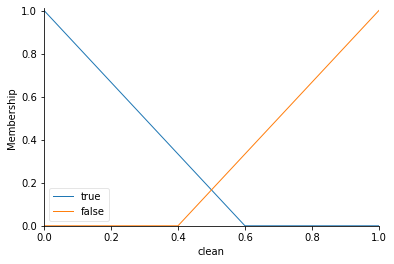

In [7]:
clean = ctrl.Consequent(np.arange(0, 1.1, 0.1), "clean")

clean['true'] = trapezoid(clean.universe, -1, 0, 0, 0.6)
clean['false'] = trapezoid(clean.universe, 0.4, 1, 1, 2)

clean.view()

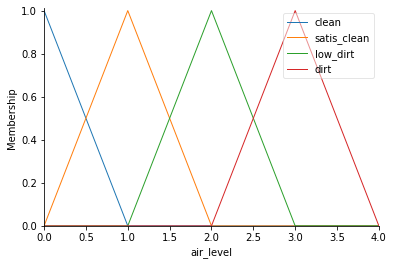

In [8]:
air_level = ctrl.Consequent(np.arange(0, 5, 1), "air_level")

air_level['clean'] = trapezoid(air_level.universe, -1, 0, 0, 1)
air_level['satis_clean'] = trapezoid(air_level.universe, 0, 1, 1, 2)
air_level['low_dirt'] = trapezoid(air_level.universe, 1, 2, 2, 3)
air_level['dirt'] = trapezoid(air_level.universe, 1, 3, 3, 4)

air_level.view()

In [13]:
rule1 = ctrl.Rule(co2['very_low'] & STFc['very_low'] & STFs['very_low'] & oxigen['very_low'], 
                  [clean['true'], air_level['clean']])

rule2 = ctrl.Rule(co2['very_low'] & STFc['very_low'] & STFs['very_low'] & oxigen['low'], 
                  [clean['true'], air_level['clean']])
rule3 = ctrl.Rule(co2['low'] & STFc['mid'] & STFs['mid'] & oxigen['mid'], 
                  [clean['true'], air_level['satis_clean']])
rule4 = ctrl.Rule(co2['low'] & STFc['mid'] & STFs['low'] & oxigen['mid'], 
                  [clean['true'], air_level['satis_clean']])
rule5 = ctrl.Rule(co2['low'] & STFc['low'] & STFs['mid'] & oxigen['mid'], 
                  [clean['true'], air_level['satis_clean']])
rule6 = ctrl.Rule(co2['very_low'] & STFc['low'] & STFs['mid'] & oxigen['mid'], 
                  [clean['true'], air_level['satis_clean']])
rule7 = ctrl.Rule(co2['very_low'] & STFc['mid'] & STFs['mid'] & oxigen['mid'], 
                  [clean['true'], air_level['satis_clean']])
rule8 = ctrl.Rule(co2['very_low'] & STFc['low'] & STFs['low'] & oxigen['mid'], 
                  [clean['true'], air_level['satis_clean']])
rule9 = ctrl.Rule(co2['very_low'] & STFc['mid'] & STFs['low'] & oxigen['mid'], 
                  [clean['true'], air_level['satis_clean']])

rule10 = ctrl.Rule(co2['mid'] & STFc['mid'] & STFs['mid'] & oxigen['high'], 
                  [clean['true'], air_level['low_dirt']])
rule11 = ctrl.Rule(co2['low'] & STFc['mid'] & STFs['mid'] & oxigen['mid'], 
                  [clean['true'], air_level['low_dirt']])
rule12 = ctrl.Rule(co2['mid'] & STFc['low'] & STFs['low'] & oxigen['mid'], 
                  [clean['true'], air_level['low_dirt']])
rule13 = ctrl.Rule(co2['low'] & STFc['mid'] & STFs['mid'] & oxigen['high'], 
                  [clean['true'], air_level['low_dirt']])
rule14 = ctrl.Rule(co2['low'] & STFc['low'] & STFs['low'] & oxigen['high'], 
                  [clean['true'], air_level['low_dirt']])
rule15 = ctrl.Rule(co2['low'] & STFc['mid'] & STFs['low'] & oxigen['high'], 
                  [clean['true'], air_level['low_dirt']])
rule16 = ctrl.Rule(co2['low'] & STFc['low'] & STFs['mid'] & oxigen['high'], 
                  [clean['true'], air_level['low_dirt']])
rule17 = ctrl.Rule(co2['very_low'] & STFc['low'] & STFs['mid'] & oxigen['high'], 
                  [clean['true'], air_level['low_dirt']])
rule18 = ctrl.Rule(co2['very_low'] & STFc['mid'] & STFs['mid'] & oxigen['high'], 
                  [clean['true'], air_level['low_dirt']])
rule19 = ctrl.Rule(co2['very_low'] & STFc['low'] & STFs['low'] & oxigen['high'], 
                  [clean['true'], air_level['low_dirt']])
rule20 = ctrl.Rule(co2['very_low'] & STFc['mid'] & STFs['low'] & oxigen['high'], 
                  [clean['true'], air_level['low_dirt']])
rule21 = ctrl.Rule(co2['low'] & STFc['mid'] & STFs['low'] & oxigen['mid'], 
                  [clean['true'], air_level['low_dirt']])
rule23 = ctrl.Rule(co2['low'] & STFc['mid'] & STFs['mid'] & oxigen['mid'], 
                  [clean['true'], air_level['low_dirt']])
rule24 = ctrl.Rule(co2['very_low'] & STFc['mid'] & STFs['mid'] & oxigen['mid'], 
                  [clean['true'], air_level['low_dirt']])
rule25 = ctrl.Rule(co2['very_low'] & STFc['mid'] & STFs['mid'] & oxigen['mid'], 
                  [clean['true'], air_level['low_dirt']])
rule26 = ctrl.Rule(co2['very_low'] & STFc['mid'] & STFs['low'] & oxigen['mid'], 
                  [clean['true'], air_level['low_dirt']])

rule27 = ctrl.Rule(co2['high'] & STFc['very_low'] & STFs['very_low'] & oxigen['low'], 
                  [clean['false']])
rule28 = ctrl.Rule(co2['high'] & STFc['high'] & STFs['high'] & oxigen['high'], 
                  [clean['false']])
rule29 = ctrl.Rule(co2['high'] & STFc['low'] & STFs['high'] & oxigen['high'], 
                  [clean['false']])
rule30 = ctrl.Rule(co2['mid'] & STFc['mid'] & STFs['very_low'] & oxigen['high'], 
                  [clean['false']])
rule31 = ctrl.Rule(co2['very_low'] & STFc['very_low'] & STFs['very_low'] & oxigen['high'], 
                  [clean['false']])
rule32 = ctrl.Rule(co2['high'] & STFc['mid'] & STFs['low'] & oxigen['low'], 
                  [clean['false']])
rule33 = ctrl.Rule(co2['high'] & STFc['mid'] & STFs['low'] & oxigen['high'], 
                  [clean['false']])
rule34 = ctrl.Rule(co2['very_low'] & STFc['very_low'] & STFs['very_low'] & oxigen['high'], 
                  [clean['false']])
rule35 = ctrl.Rule(co2['high'] & STFc['high'] & STFs['high'] & oxigen['high'], 
                  [clean['false'], air_level['dirt']])

In [14]:
rules_base = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
              rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
              rule20, rule21, rule23, rule24, rule25, rule26, rule27,
              rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35]

mark_ctrl = ctrl.ControlSystem(rules_base)

In [15]:
marking = ctrl.ControlSystemSimulation(mark_ctrl)

0.8


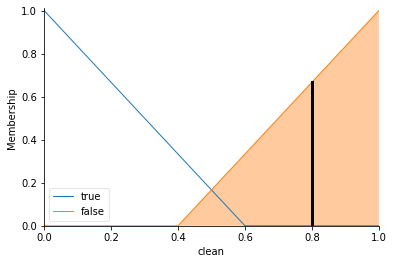

In [16]:
# Проверка системы
marking.input['co2'] = 10
marking.input['STFc'] =300
marking.input['STFs'] = 300
marking.input['oxigen'] = 1000
marking.compute()

print(marking.output['clean'])
clean.view(sim=marking)

3.0


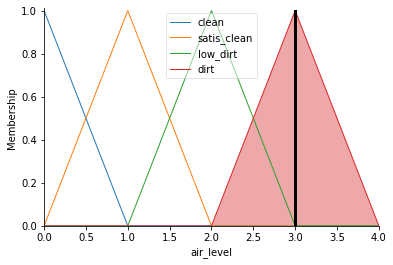

In [17]:
print(marking.output['air_level'])
air_level.view(sim=marking)